In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("17_student_performance_estimation.csv")
df.head()

,student_id,study_hours,absences,school_support,final_grade
0,S0001,28.9,8,no,30
1,S0002,14.8,10,yes,100
2,S0003,10.5,7,yes,87
3,S0004,18.4,7,yes,47
4,S0005,15.3,1,no,82


In [6]:
df.drop(columns=["student_id"], inplace=True)#this column not required for modelling

In [7]:
print(df['school_support'].value_counts())

school_support
yes    509
no     491
Name: count, dtype: int64


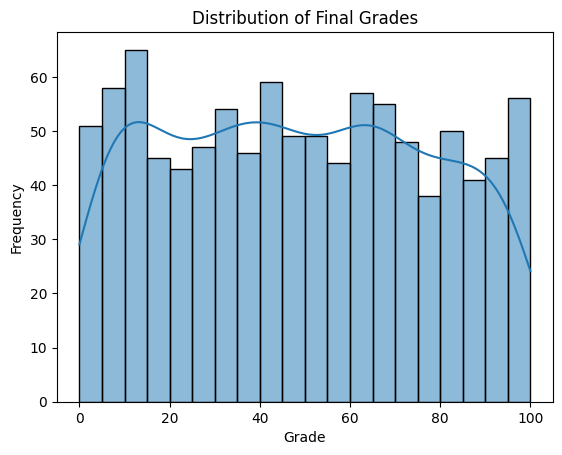

In [8]:
sns.histplot(df['final_grade'], bins=20, kde=True)
plt.title("Distribution of Final Grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

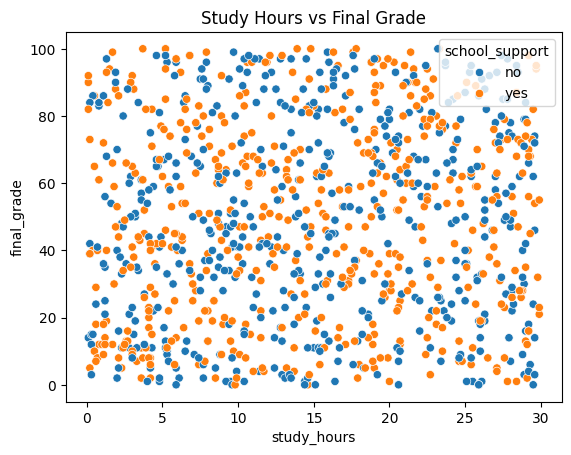

In [9]:
sns.scatterplot(data=df, x='study_hours', y='final_grade', hue='school_support')
plt.title("Study Hours vs Final Grade")
plt.show()


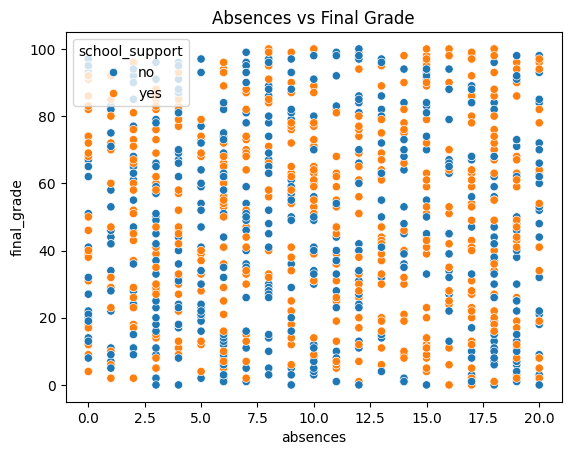

In [10]:
sns.scatterplot(data=df, x='absences', y='final_grade', hue='school_support')
plt.title("Absences vs Final Grade")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
df['school_support'] = LabelEncoder().fit_transform(df['school_support'])

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.drop(columns=["final_grade"])
y = df["final_grade"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = DecisionTreeRegressor(random_state=42, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error: 849.41
R² Score: -0.02


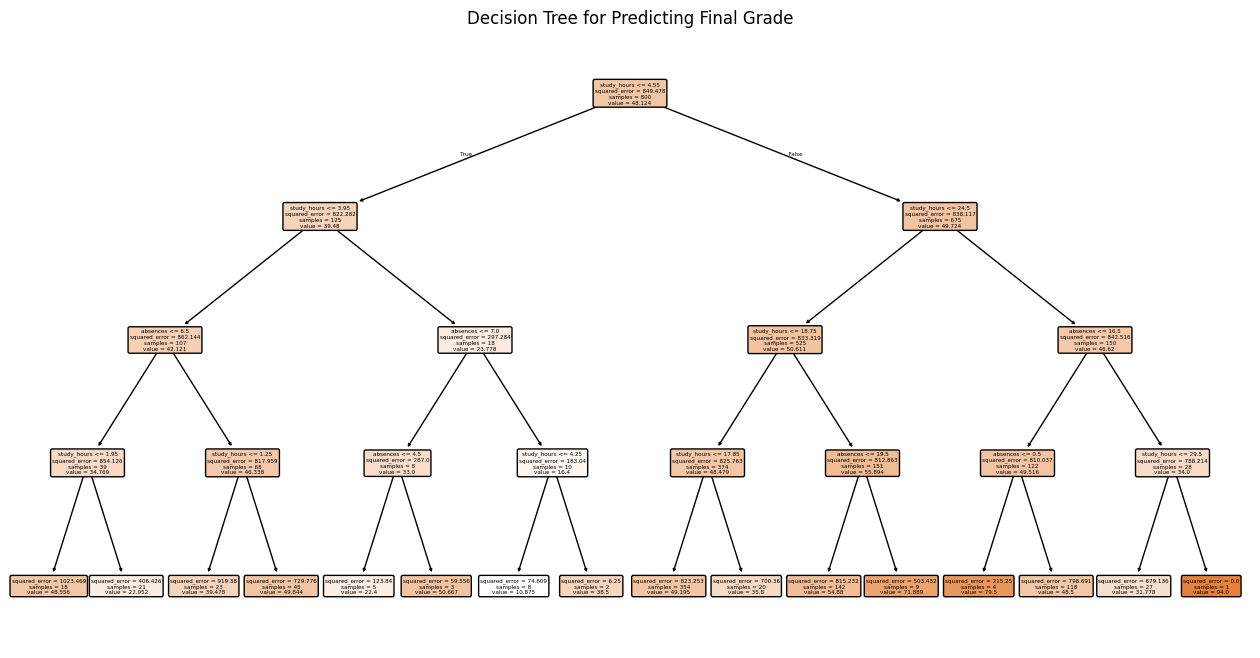

In [19]:
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Predicting Final Grade")
plt.show()